# Introduction 

#### What is Reddit

Reddit is an American social news aggregation, web content rating, and discussion website. Registered members submit content to the site such as links, text posts, and images, which are then voted up or down by other members. Posts are organized by subject into boards called "subreddits", which cover a variety of topics including news, science, movies, video games, music, books, fitness, food, and image-sharing. Submissions with more up-votes appear towards the top of their subreddit and, if they receive enough votes, ultimately on the site's front page. Despite strict rules prohibiting harassment, Reddit's administrators spend considerable resources on moderating the site.

As of 2017, Reddit had 542 million monthly visitors (234 million unique users), ranking as the #4 most visited website in U.S. and #8 in the world.Across 2015, Reddit saw 82.54 billion pageviews, 73.15 million submissions, 725.85 million comments, and 6.89 billion upvotes from its users.

#### Goals of the Project 

At a high level reddit dataset used for this analysis is a collection of reddit posts on different topics (classified as a subreddit). The content of of the text is stored in a self text column. Each post has some numerical attributes like score, ups and downs. The score is the difference of the ups and the downs 

The primarily goal of this project is to 

1. Build a regressor model to predict the score on a post based on the self_text column
2. Build a classifier model to predict the subredit category of the post depeneding in the self_text column


# Importing the Needed Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, \
HashingVectorizer, TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_union, make_pipeline
from sklearn.svm import SVC, SVR
from sklearn import svm

import string

# Setting up the display options

In [3]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Loading the Reddit CSV file for analysis

In [4]:
data = pd.read_csv('reddit_posts.csv')

# Data Analysis

In [5]:
data.head()

,adserver_click_url,adserver_imp_pixel,archived,author,author_flair_css_class,author_flair_text,contest_mode,created_utc,disable_comments,distinguished,domain,downs,edited,gilded,hide_score,href_url,id,imp_pixel,is_self,link_flair_css_class,link_flair_text,locked,media,media_embed,mobile_ad_url,name,num_comments,original_link,over_18,permalink,post_hint,preview,promoted,promoted_by,promoted_display_name,promoted_url,quarantine,retrieved_on,saved,score,secure_media,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,third_party_tracking,third_party_tracking_2,thumbnail,title,ups,url
0,NaN,NaN,False,johnnyawesome0,NaN,NaN,False,1480697304,NaN,NaN,self.techsupport,0.0,False,0.0,False,NaN,5g49s2,NaN,True,NaN,NaN,False,NaN,{},NaN,t3_5g49s2,1.0,NaN,False,/r/techsupport/comments/5g49s2/help_with_audio...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},I have a Sony surround sound system for a blu-...,False,False,techsupport,t5_2qioo,NaN,NaN,self,Help with audio set-up,1.0,https://www.reddit.com/r/techsupport/comments/...
1,NaN,NaN,False,Silverfin113,NaN,NaN,False,1480697424,NaN,NaN,self.learnprogramming,0.0,False,0.0,False,NaN,5g4a5p,NaN,True,NaN,NaN,False,NaN,{},NaN,t3_5g4a5p,8.0,NaN,False,/r/learnprogramming/comments/5g4a5p/optimizing...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,23.0,NaN,{},I've written what seems to be a prohibitively ...,False,False,learnprogramming,t5_2r7yd,NaN,NaN,self,Optimizing code for speed,23.0,https://www.reddit.com/r/learnprogramming/comm...
2,NaN,NaN,False,bookbooksbooks,NaN,NaN,False,1480697613,NaN,NaN,self.gamedev,0.0,False,0.0,False,NaN,5g4att,NaN,True,discussion cat-talk,Discussion,False,NaN,{},NaN,t3_5g4att,5.0,NaN,False,/r/gamedev/comments/5g4att/seeking_tales_of_de...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,12.0,NaN,{},"I'm writing an article called ""Video Games Tha...",False,False,gamedev,t5_2qi0a,NaN,NaN,self,Seeking Tales of Development Woe (and Triumph)...,12.0,https://www.reddit.com/r/gamedev/comments/5g4a...
3,NaN,NaN,False,[deleted],NaN,NaN,False,1480697634,NaN,NaN,self.learnprogramming,0.0,1480698462,0.0,False,NaN,5g4awr,NaN,True,solved,Solved,False,NaN,{},NaN,t3_5g4awr,9.0,NaN,False,/r/learnprogramming/comments/5g4awr/java_findi...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,0.0,NaN,{},[deleted],False,False,learnprogramming,t5_2r7yd,NaN,NaN,default,[Java] Finding smallest value in an array,0.0,https://www.reddit.com/r/learnprogramming/comm...
4,NaN,NaN,False,caffeine_potent,NaN,NaN,False,1480697748,NaN,NaN,self.learnpython,0.0,1480709138,0.0,False,NaN,5g4bcr,NaN,True,NaN,NaN,False,NaN,{},NaN,t3_5g4bcr,12.0,NaN,False,/r/learnpython/comments/5g4bcr/currying_functi...,NaN,NaN,NaN,NaN,NaN,NaN,False,1.484297e+09,False,6.0,NaN,{},I have the following representation of argumen...,False,False,learnpython,t5_2r8ot,NaN,NaN,self,currying functions using functools,6.0,https://www.reddit.com/r/learnpython/comments/...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688 entries, 0 to 26687
Data columns (total 53 columns):
adserver_click_url        0 non-null float64
adserver_imp_pixel        0 non-null float64
archived                  26688 non-null bool
author                    26688 non-null object
author_flair_css_class    435 non-null object
author_flair_text         351 non-null object
contest_mode              26688 non-null bool
created_utc               26688 non-null int64
disable_comments          0 non-null float64
distinguished             85 non-null object
domain                    26688 non-null object
downs                     26688 non-null float64
edited                    26688 non-null object
gilded                    26688 non-null float64
hide_score                26688 non-null bool
href_url                  0 non-null float64
id                        26688 non-null object
imp_pixel                 0 non-null float64
is_self                   26688 non-null bool
link_fla

In [7]:
'''Printing out the list of Columns'''

print (list(data.columns))

['adserver_click_url', 'adserver_imp_pixel', 'archived', 'author', 'author_flair_css_class', 'author_flair_text', 'contest_mode', 'created_utc', 'disable_comments', 'distinguished', 'domain', 'downs', 'edited', 'gilded', 'hide_score', 'href_url', 'id', 'imp_pixel', 'is_self', 'link_flair_css_class', 'link_flair_text', 'locked', 'media', 'media_embed', 'mobile_ad_url', 'name', 'num_comments', 'original_link', 'over_18', 'permalink', 'post_hint', 'preview', 'promoted', 'promoted_by', 'promoted_display_name', 'promoted_url', 'quarantine', 'retrieved_on', 'saved', 'score', 'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied', 'subreddit', 'subreddit_id', 'third_party_tracking', 'third_party_tracking_2', 'thumbnail', 'title', 'ups', 'url']


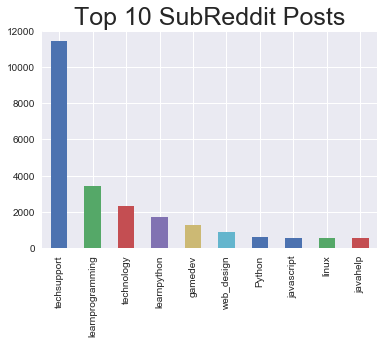

In [8]:
'''Top 10 SubReddit Posts'''

data.subreddit.value_counts()[0:10].plot(kind='bar')
plt.title('Top 10 SubReddit Posts', fontsize=25)

## Null Columns

In [9]:
'''Getting list of columns with all null columns'''
all_null_columns = data.columns[data.isnull().sum()==len(data)]

In [10]:
'''Getting the total number columns that have all null values'''
len(all_null_columns)

13

# Dropping the Null Columns

In [11]:
'''Using the drop function to drop all the null columns'''
data.drop(all_null_columns,axis=1, inplace=True)

In [13]:
data.head()

,archived,author,author_flair_css_class,author_flair_text,contest_mode,created_utc,distinguished,domain,downs,edited,gilded,hide_score,id,is_self,link_flair_css_class,link_flair_text,locked,media,media_embed,name,num_comments,over_18,permalink,post_hint,preview,quarantine,retrieved_on,saved,score,secure_media,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,thumbnail,title,ups,url
0,False,johnnyawesome0,NaN,NaN,False,1480697304,NaN,self.techsupport,0.0,False,0.0,False,5g49s2,True,NaN,NaN,False,NaN,{},t3_5g49s2,1.0,False,/r/techsupport/comments/5g49s2/help_with_audio...,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},I have a Sony surround sound system for a blu-...,False,False,techsupport,t5_2qioo,self,Help with audio set-up,1.0,https://www.reddit.com/r/techsupport/comments/...
1,False,Silverfin113,NaN,NaN,False,1480697424,NaN,self.learnprogramming,0.0,False,0.0,False,5g4a5p,True,NaN,NaN,False,NaN,{},t3_5g4a5p,8.0,False,/r/learnprogramming/comments/5g4a5p/optimizing...,NaN,NaN,False,1.484297e+09,False,23.0,NaN,{},I've written what seems to be a prohibitively ...,False,False,learnprogramming,t5_2r7yd,self,Optimizing code for speed,23.0,https://www.reddit.com/r/learnprogramming/comm...
2,False,bookbooksbooks,NaN,NaN,False,1480697613,NaN,self.gamedev,0.0,False,0.0,False,5g4att,True,discussion cat-talk,Discussion,False,NaN,{},t3_5g4att,5.0,False,/r/gamedev/comments/5g4att/seeking_tales_of_de...,NaN,NaN,False,1.484297e+09,False,12.0,NaN,{},"I'm writing an article called ""Video Games Tha...",False,False,gamedev,t5_2qi0a,self,Seeking Tales of Development Woe (and Triumph)...,12.0,https://www.reddit.com/r/gamedev/comments/5g4a...
3,False,[deleted],NaN,NaN,False,1480697634,NaN,self.learnprogramming,0.0,1480698462,0.0,False,5g4awr,True,solved,Solved,False,NaN,{},t3_5g4awr,9.0,False,/r/learnprogramming/comments/5g4awr/java_findi...,NaN,NaN,False,1.484297e+09,False,0.0,NaN,{},[deleted],False,False,learnprogramming,t5_2r7yd,default,[Java] Finding smallest value in an array,0.0,https://www.reddit.com/r/learnprogramming/comm...
4,False,caffeine_potent,NaN,NaN,False,1480697748,NaN,self.learnpython,0.0,1480709138,0.0,False,5g4bcr,True,NaN,NaN,False,NaN,{},t3_5g4bcr,12.0,False,/r/learnpython/comments/5g4bcr/currying_functi...,NaN,NaN,False,1.484297e+09,False,6.0,NaN,{},I have the following representation of argumen...,False,False,learnpython,t5_2r8ot,self,currying functions using functools,6.0,https://www.reddit.com/r/learnpython/comments/...


# ups column Analysis

In [14]:
data['ups'].value_counts()[:25]

1.0     15301
0.0      3699
2.0      2784
3.0      1306
4.0       542
5.0       482
6.0       373
7.0       286
8.0       201
9.0       144
10.0      130
11.0      106
12.0       92
13.0       80
14.0       71
15.0       67
16.0       53
18.0       46
20.0       43
17.0       42
19.0       40
22.0       29
25.0       27
Name: ups, dtype: int64

We see that the most ups votes are "1", followed by "0", "2" and "3" 

# Score column Analysis

In [106]:
data['score'].value_counts()[:25]

1.0     15301
0.0      3699
2.0      2784
3.0      1306
4.0       542
5.0       482
6.0       373
7.0       286
8.0       201
9.0       144
10.0      130
11.0      106
12.0       92
13.0       80
14.0       71
15.0       67
16.0       53
18.0       46
20.0       43
17.0       42
19.0       40
22.0       29
25.0       27
Name: score, dtype: int64

The distribution of UPS and Score look excatly the same. Hence we are going to look at the down columns as well. It is possible that all of the subrredit posts in this dataset has 0 votes, hence the score and the UPS columns is all the same  

# Down Column Analysis

In [15]:
'''Looking at the list of Downs columns in the dataframe'''
data.downs.value_counts()

0.0    26688
Name: downs, dtype: int64

The result above just confirms our hypothesis

We see that most of the posts got one vote. The next big batch of posts are the ones with 0, 2 and 3 votes

# Deleted SelfText 

In [18]:
'''Valuating SelfText columns which have the word deleted in them'''

data.loc[data['selftext']=='[deleted]',:][:5]

,archived,author,author_flair_css_class,author_flair_text,contest_mode,created_utc,distinguished,domain,downs,edited,gilded,hide_score,id,is_self,link_flair_css_class,link_flair_text,locked,media,media_embed,name,num_comments,over_18,permalink,post_hint,preview,quarantine,retrieved_on,saved,score,secure_media,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,thumbnail,title,ups,url
3,False,[deleted],NaN,NaN,False,1480697634,NaN,self.learnprogramming,0.0,1480698462,0.0,False,5g4awr,True,solved,Solved,False,NaN,{},t3_5g4awr,9.0,False,/r/learnprogramming/comments/5g4awr/java_findi...,NaN,NaN,False,1.484297e+09,False,0.0,NaN,{},[deleted],False,False,learnprogramming,t5_2r7yd,default,[Java] Finding smallest value in an array,0.0,https://www.reddit.com/r/learnprogramming/comm...
6,False,[deleted],NaN,NaN,False,1480697781,NaN,self.Python,0.0,False,0.0,False,5g4bg2,True,NaN,NaN,False,NaN,{},t3_5g4bg2,5.0,False,/r/Python/comments/5g4bg2/how_can_i_use_differ...,NaN,NaN,False,1.484297e+09,False,0.0,NaN,{},[deleted],False,False,Python,t5_2qh0y,default,How can I use (different 'groups' of 8 differe...,0.0,https://www.reddit.com/r/Python/comments/5g4bg...
10,False,[deleted],NaN,NaN,False,1480698138,NaN,amazon.com,0.0,False,0.0,False,5g4clp,False,NaN,NaN,False,NaN,{},t3_5g4clp,0.0,False,/r/technology/comments/5g4clp/do_you_life_adve...,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},[deleted],False,False,technology,t5_2qh16,default,Do you life adventure? Don't forget to take th...,1.0,https://www.amazon.com/Paracord-Survival-Brace...
11,False,[deleted],NaN,NaN,False,1480698278,NaN,popsci.com,0.0,False,0.0,False,5g4d5c,False,general,AI,False,NaN,{},t3_5g4d5c,0.0,False,/r/technology/comments/5g4d5c/reuters_built_a_...,NaN,NaN,False,1.484297e+09,False,3.0,NaN,{},[deleted],False,False,technology,t5_2qh16,default,Reuters built a bot that can identify real new...,3.0,http://www.popsci.com/artificial-intelligence-...
17,False,[deleted],NaN,NaN,False,1480698834,NaN,self.techsupport,0.0,False,0.0,False,5g4f2j,True,NaN,NaN,False,NaN,{},t3_5g4f2j,12.0,False,/r/techsupport/comments/5g4f2j/connect_pc_to_l...,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},[deleted],False,False,techsupport,t5_2qioo,default,Connect PC to laptop,1.0,https://www.reddit.com/r/techsupport/comments/...


In [19]:
print (len(data.loc[data['selftext']=='[deleted]',:]))

5269


**This shows that out of the ~28k posts close to 5k posts were deleted by the user**

In [20]:
'''Validating one instance of the self text column that has the word deleted in it'''

data['selftext'][0]

'I have a Sony surround sound system for a blu-ray player with the 4.2mm connectors. Is there a way I can play all my other devices through my speakers. What kind of connectors and amps do I need to get it to work'

## Subreddit Category with the most UPS Votes

In [22]:
'''Trying to get a sense of the specific reddit group that has the most UPS votes'''

data.groupby(by='subreddit',axis=0).ups.sum().sort_values(ascending=False)

subreddit
technology          79953.0
learnprogramming    38286.0
gamedev             18855.0
techsupport         18515.0
linux               11989.0
learnpython          9852.0
Python               6006.0
web_design           4631.0
engineering          3939.0
javascript           2136.0
PHP                  1549.0
java                 1538.0
compsci              1390.0
javahelp             1159.0
iOSProgramming       1042.0
dailyprogrammer       753.0
swift                 735.0
computerscience       708.0
csshelp               629.0
cpp                   607.0
django                579.0
ruby                  520.0
programming           511.0
netsec                498.0
css                   309.0
flask                 230.0
html5                 171.0
perl                  168.0
HTML                  146.0
jquery                118.0
pygame                114.0
lisp                   90.0
coding                 65.0
programmer             28.0
IPython                27.0
inventwith

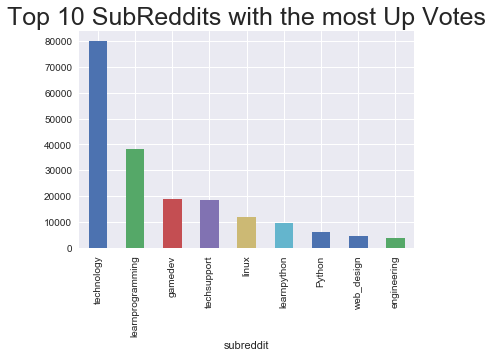

In [23]:
'''Plotting the top 10 Subreddit posts that have the most UPS votes'''

data.groupby(by='subreddit',axis=0).ups.sum().sort_values(ascending=False)[0:9].plot(kind='bar')
plt.title('Top 10 SubReddits with the most Up Votes', fontsize=25)

Notably a lot of technology posts seem to be getting the most upvotes

For the puposes of this analysis we are going to look at three feature columns

* Self Text 
* SubReddit 
* Title 

We are going to be using some NLP techniques for this process



We are going to take out the rows were the user had gone ahead and deleted the posts. These are categorized as [deleted] in the selftext columns 

In [24]:
clean_data = data.loc[data['selftext']!='[deleted]',:]
clean_data.head()

,archived,author,author_flair_css_class,author_flair_text,contest_mode,created_utc,distinguished,domain,downs,edited,gilded,hide_score,id,is_self,link_flair_css_class,link_flair_text,locked,media,media_embed,name,num_comments,over_18,permalink,post_hint,preview,quarantine,retrieved_on,saved,score,secure_media,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,thumbnail,title,ups,url
0,False,johnnyawesome0,NaN,NaN,False,1480697304,NaN,self.techsupport,0.0,False,0.0,False,5g49s2,True,NaN,NaN,False,NaN,{},t3_5g49s2,1.0,False,/r/techsupport/comments/5g49s2/help_with_audio...,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},I have a Sony surround sound system for a blu-...,False,False,techsupport,t5_2qioo,self,Help with audio set-up,1.0,https://www.reddit.com/r/techsupport/comments/...
1,False,Silverfin113,NaN,NaN,False,1480697424,NaN,self.learnprogramming,0.0,False,0.0,False,5g4a5p,True,NaN,NaN,False,NaN,{},t3_5g4a5p,8.0,False,/r/learnprogramming/comments/5g4a5p/optimizing...,NaN,NaN,False,1.484297e+09,False,23.0,NaN,{},I've written what seems to be a prohibitively ...,False,False,learnprogramming,t5_2r7yd,self,Optimizing code for speed,23.0,https://www.reddit.com/r/learnprogramming/comm...
2,False,bookbooksbooks,NaN,NaN,False,1480697613,NaN,self.gamedev,0.0,False,0.0,False,5g4att,True,discussion cat-talk,Discussion,False,NaN,{},t3_5g4att,5.0,False,/r/gamedev/comments/5g4att/seeking_tales_of_de...,NaN,NaN,False,1.484297e+09,False,12.0,NaN,{},"I'm writing an article called ""Video Games Tha...",False,False,gamedev,t5_2qi0a,self,Seeking Tales of Development Woe (and Triumph)...,12.0,https://www.reddit.com/r/gamedev/comments/5g4a...
4,False,caffeine_potent,NaN,NaN,False,1480697748,NaN,self.learnpython,0.0,1480709138,0.0,False,5g4bcr,True,NaN,NaN,False,NaN,{},t3_5g4bcr,12.0,False,/r/learnpython/comments/5g4bcr/currying_functi...,NaN,NaN,False,1.484297e+09,False,6.0,NaN,{},I have the following representation of argumen...,False,False,learnpython,t5_2r8ot,self,currying functions using functools,6.0,https://www.reddit.com/r/learnpython/comments/...
5,False,uzbek1993,NaN,NaN,False,1480697775,NaN,self.learnprogramming,0.0,False,0.0,False,5g4bfi,True,NaN,NaN,False,NaN,{},t3_5g4bfi,1.0,False,/r/learnprogramming/comments/5g4bfi/text_edito...,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},I am about to create a website where users use...,False,False,learnprogramming,t5_2r7yd,self,Text Editor integration,1.0,https://www.reddit.com/r/learnprogramming/comm...


# Aggregating the SelfText, Title and Subreddit columns

In [29]:
self_text = clean_data['selftext']
title = clean_data['title']
subreddit = clean_data['subreddit']

In [30]:
clean_data['aggregated_column'] = clean_data['selftext'] + ' ' + clean_data['subreddit'] + ' ' +  clean_data['title'] 

/Users/ajinthchristudas/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Model Building 

## Model 1: Linear Regression Model with aggregated column to predict the ups (up votes)

The model uses a Vectorizer, SVD and a simple Linear Regression to build a base model

# Vectorizer

In [26]:
'''Setting up the Vectorizer and doing the NLP stuff'''

X = clean_data['aggregated_column']
y = clean_data['ups']

vt = CountVectorizer(stop_words='english')
X_vt = vt.fit(X)
X_vt_transform = X_vt.transform(X)

In [27]:
'''Creating a dataframe using the transformed Values'''
x_vt_df = pd.DataFrame(X_vt_transform.todense(), columns=X_vt.get_feature_names(), index=clean_data.index)
x_vt_df.head()

,00,000,0000,00000,000000,0000000,00000000,000000000000,0000000000000000,0000000000000001,0000000000000002,0000000000000006,0000000000000007,0000000000000008,000000000000000a,00000000000003f8,000000000001,000000000001e1ac,000000000002,000000000008,0000000000100000,00000000004e,000000000059,0000000001,0000000001056,00000000020f,000000000216,0000000005410aae,000000000543,0000000005a1,000000000f4a,0000000043c3,0000000044e7,0000000045,0000000046,0000000047,0000000048,00000001,0000000186bf,00000002,00000004,00000008,0000000a,00000018,00000020c2cd,0000002b,00000032,00000080,00000098,000000f7,00000119,000002047c2e92ec,0000029e,000002a0,000002ee,000002f0,000002ff,00000301,00000347,00000349,000004713c58,000004c2,000005471,000005636,0000057c7b8d,000005827,0000059f1510,000011112222333344445555,000011112223334244345555,000011112223335544345254,000011112224335544245353,000011112225332444545353,000011112225333344545452,000011112322423334445555,000011112323424234345555,000011112323425534345254,000011112324425534245353,000011112325422434545353,000019513,0000200,0000210,000023114223344211345555,00002b1d002b,0000300,000056448244,00006,00007fa792eff412,00007ffe,00007ffe0cc2f3d8,00008,0001,000100010003,00010005,00010206,0002,00021a,00023934,00028,0003,000325187,0003264,000328172c15,0003de50,00041201,000445676773010882840b162430486c0301072a01042f010430140100000fac040100000fac040100000fac020c0032040c1218602d1afc181fffff0000000000000000000000000000000000000000003d16070017000000000000000000000000000000000000004a0e14000a002c01c8001400050019007f0101dd890050f204104a0001101044000102103b00010310470010177b8b3ae292d7c44b93d4616ff30e7e1021000d4e4554474541522c20496e632e1023000a574e44523334303076331024000a574e44523334303076331042000230311054000800060050f20400011011000a574e4452333430307633100800020004103c0001031049000600372a000120dd090010180204f0040000dd180050f2020101800003a4000027a4000042435e0062322f00,00053a0416d7,0006,0006011db882,0007,00071e13001e,0008,000car,000g3,000l7,000xe,001,0010,00100102,00102,0011,0011001001110000110111,00135,00170000002b,0018,001car,001f,001meimei,001msbv,001x,002,0022aaa,0027,0028,0029,002b,002car,002x,003,00326,003629,003bc468,003c,003car,003f,004,0040,0041fb76deca4f9a8822a212c33cfa48,00426,00438,0047bd69fdb9,00497,0049de,004v,005,00517,0053,0056,0057,005v,006,00644,006600,00675b37ec334e87055b1b5dbf24550f,006c,006it,007,007287,0078,0079d3,007huwai,007j,008,008012,0080ff,0083,00838e51422f3ba230bd7e44c8a5d591,008391,008461,00847150,009,009002,00922,009670,009950,009hg,00a0c91efb8b,00aef52f6af6bcacee12f8476154ccd0,00am,00bn5a0,00cc00,00cc99,00d007,00erma0,00fang,00fb,00gb,00ghz,00h,00l4hb0,00m1wn,00p8b0,00pg,00pm,00porn,00s,00wfly,00wn4a0,00wn9b0,00x,00z3a0,00z4sa0,01,010,0100,0100011011100101000111,0100102,0101,010100,01010000,01010208,0101h,0101mobile,0102,01051,010987866048,010ing,010trane,010v,011,0110,0111,01111110,011649,011856,011978,011production,012,012012,012012012,012283,0123456789,01235,0123bet,012641200z,012c,013,0131,013dcedfac03048f63493eece3d16be9,014,0140,...,решается,решился,роrtаblе,роssіblе,роsіtіоn,рорs,ріnnеd,сhrоmе,сhrоmіum,сhаngе,сhоsе,сlоvеr,сore,сrеаtе,сurrеntlу,сurіоus,сustоmіzаtіоn,сделанных,сеrtаіn,сейчас,система,систему,системы,скачались,сладко,слова,случается,соmрutеr,соntеnt,соrnеr,соrtаnа,совершенно,совсем,сожалению,сообщество,сохранить,список,сразу,стал,стандартный,стану,тrоublе,та,такая,такого,такой,там,теме,теперь,то,только,тот,удобна,уже,указать,улучшится,уоu,уоur,уоursеlf,упустить,услышание,устанавливать,установились,установить,установки,установку,установлена,файлы,флеш,фраза,хотел,целом,чем,чисто,что,чтобы,чуть,шрифты,эмулятор,эта,этим,это,являюсь,ѕrwаrе,ѕtеаm,ѕоmеthіng,ѕіmіlаr,іf,іn,іnstаll,іnstаllіng,іntо,іrоn,іs,іt,іtsеlf,јust,اداری,ارزان,اسکناس,اسکنر,اسکوپ,افشان,الادارة,الجهاز,الخطير,الذكي,الذي,السيارات,انواع,انواعها,اپتما,اپسون,اچ,ایستاده,ایسر,بارکد,باکس,بجميع,برادر,برد,برقی,بهترین,تارا,تحمي,ترین,تست,تكنولوجيا,توشیبا,تک,تی,جوهر,حرارتی,خرید,خوان,درام,دستگاه,دستی,دیتا,رفلکتا,رمو,رنگی,رول,ریک

In [115]:
len(x_vt_df.columns)

61317

There are 63k, columns. We definitely wont need all of this. Reducing them in dimensionality using PCA can be very helpful. We'll be using a variant of PCA known as TruncatedSVD. It does more or less the same thing as PCA but in a slightly different fashion. It's best used with sparse matrices like these.

# Applying Truncated SVD

In [116]:
truncatedSVD = TruncatedSVD(n_components=4000)
truncatedSVD.fit(X_vt_transform)

TruncatedSVD(algorithm='randomized', n_components=4000, n_iter=5,
       random_state=None, tol=0.0)

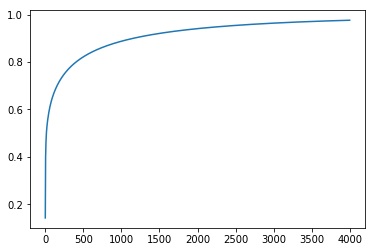

In [118]:
plt.plot(range(4000), truncatedSVD.explained_variance_ratio_.cumsum())

Based on the plot above we can assume that the best case for the number of components to be considered would be ~ 1500. We are going to use SVD with a 1000 components due to performance limitations

In [31]:
'''Using 1000 components to find the new fit'''

truncatedSVD_2k = TruncatedSVD(n_components=1000)
truncatedSVD_2k.fit(x_vt_df)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
       random_state=None, tol=0.0)

In [32]:
truncatedSVD_2k_transform = truncatedSVD_2k.transform(x_vt_df)

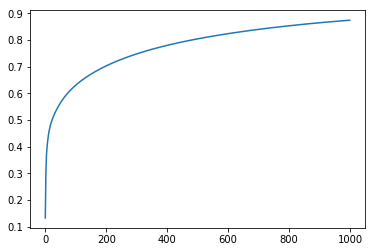

In [34]:
plt.plot(range(1000), truncatedSVD_2k.explained_variance_ratio_.cumsum())

# Using the Regressor to Predict the Up Votes

In [32]:
'''Assigning the Target and the Predictor Variables'''

y = clean_data['score']
X = truncatedSVD_2k_transform

Now that we have the features and the predictors, we could potentially use a train_test_split along with cross val and regression to come up with a model to predict the up votes

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Linear Regresssion

In [37]:
'''Instantiating the Linear Regression Model'''
lr = LinearRegression()

In [38]:
'''Fitting the model on training Set'''
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
'''Scoring the model on the training set'''
lr.score(X_train,y_train)

0.25544183076640636

In [40]:
'''Scoring the model on the test set'''
lr.score(X_test,y_test)

-23.428584265869659

This is a bad model! We score bad on train and worse of test

## Model 2: Random Forest Regression Model with aggregated column to predict the ups (up votes)

The model uses a Vectorizer, SVD and a simple Linear Regression to build a base model

In [41]:
'''Instantiating the Random Forest Regressor Model'''
rfr = RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1)

In [42]:
'''Fitting the Random Forest Regressor Model'''
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
'''Scoring the model on the Training Set'''
rfr.score(X_train, y_train)

0.74911129462026405

In [44]:
'''Scoring the model on the Test Set'''
rfr.score(X_test, y_test)

-3.4477184117949866

This model works comparatively better on the train, but is still bad on the test 

### Both the regressor models that used the aggregated columns have scored poorly. Hence we are going to use just the selftext column and apply CountVectorizer to predict the scores

In [45]:
'''Setting up the Vectorizer and doing the NLP stuff'''

X = clean_data['selftext']
vt = CountVectorizer(stop_words='english')
X_vt = vt.fit(X)
X_vt_transform = X_vt.transform(X)

In [46]:
'''Creating a dataframe using the transformed Values'''
x_vt_df = pd.DataFrame(X_vt_transform.todense(), columns=X_vt.get_feature_names(), index=clean_data.index)
x_vt_df.head()

,00,000,0000,00000,000000,0000000,00000000,000000000000,0000000000000000,0000000000000001,0000000000000002,0000000000000006,0000000000000007,0000000000000008,000000000000000a,00000000000003f8,000000000001,000000000001e1ac,000000000002,000000000008,0000000000100000,00000000004e,000000000059,0000000001,0000000001056,00000000020f,000000000216,0000000005410aae,000000000543,0000000005a1,000000000f4a,0000000043c3,0000000044e7,0000000045,0000000046,0000000047,0000000048,00000001,0000000186bf,00000002,00000004,00000008,0000000a,00000018,00000020c2cd,0000002b,00000032,00000080,00000098,000000f7,00000119,000002047c2e92ec,0000029e,000002a0,000002ee,000002f0,000002ff,00000301,00000347,00000349,000004713c58,000004c2,000005471,000005636,0000057c7b8d,000005827,0000059f1510,000011112222333344445555,000011112223334244345555,000011112223335544345254,000011112224335544245353,000011112225332444545353,000011112225333344545452,000011112322423334445555,000011112323424234345555,000011112323425534345254,000011112324425534245353,000011112325422434545353,000019513,0000200,0000210,000023114223344211345555,00002b1d002b,0000300,000056448244,00006,00007fa792eff412,00007ffe,00007ffe0cc2f3d8,00008,0001,000100010003,00010005,00010206,0002,00021a,00023934,00028,0003,000325187,0003264,000328172c15,0003de50,00041201,000445676773010882840b162430486c0301072a01042f010430140100000fac040100000fac040100000fac020c0032040c1218602d1afc181fffff0000000000000000000000000000000000000000003d16070017000000000000000000000000000000000000004a0e14000a002c01c8001400050019007f0101dd890050f204104a0001101044000102103b00010310470010177b8b3ae292d7c44b93d4616ff30e7e1021000d4e4554474541522c20496e632e1023000a574e44523334303076331024000a574e44523334303076331042000230311054000800060050f20400011011000a574e4452333430307633100800020004103c0001031049000600372a000120dd090010180204f0040000dd180050f2020101800003a4000027a4000042435e0062322f00,00053a0416d7,0006,0006011db882,0007,00071e13001e,0008,000car,000g3,000l7,000xe,001,0010,00100102,00102,0011,0011001001110000110111,00135,00170000002b,0018,001car,001f,001meimei,001msbv,001x,002,0022aaa,0027,0028,0029,002b,002car,002x,003,00326,003629,003bc468,003c,003car,003f,004,0040,0041fb76deca4f9a8822a212c33cfa48,00426,00438,0047bd69fdb9,00497,0049de,004v,005,00517,0053,0056,0057,005v,006,00644,006600,00675b37ec334e87055b1b5dbf24550f,006c,006it,007,007287,0078,0079d3,007huwai,007j,008,008012,0080ff,00838e51422f3ba230bd7e44c8a5d591,008391,008461,00847150,009,009002,00922,009670,009950,009hg,00a0c91efb8b,00aef52f6af6bcacee12f8476154ccd0,00am,00bn5a0,00cc00,00cc99,00d007,00erma0,00fang,00fb,00gb,00ghz,00h,00l4hb0,00m1wn,00p8b0,00pg,00pm,00porn,00s,00wfly,00wn4a0,00wn9b0,00z3a0,00z4sa0,01,010,0100,0100011011100101000111,0100102,0101,010100,01010000,01010208,0101h,0101mobile,0102,01051,010987866048,010ing,010trane,010v,011,0110,0111,01111110,011649,011856,011978,011production,012,012012,012012012,012283,0123456789,01235,0123bet,012641200z,012c,013,0131,013dcedfac03048f63493eece3d16be9,014,0140,014f9a135c9d6d59356d93e2589d6e4a,015,...,ли,ломать,людей,меня,мнение,мнения,многих,могу,мое,можно,мои,момент,монтирование,моя,му,музыкальный,на,набор,надеюсь,назад,называется,найти,намного,настройкой,не,недавно,нет,но,ну,нужен,нужно,нужны,нужные,нужный,оf,оn,оnlу,оnеs,оr,оthеr,оut,обзоров,обновления,образов,обычных,огромное,оказалось,около,он,она,они,описывать,опыт,ореn,ореnіng,ореrа,открытое,офис,очень,очистив,перейду,перехода,плагины,платная,плеер,по,поводу,поддерживаемых,подобное,полностью,получаете,получаешь,пользованию,пользователей,пользователем,помимо,помогут,поможет,помощью,понятно,попробовать,после,последние,постепенно,построенная,почти,почтовый,презентации,при,пригодна,примерно,примеру,принялся,причина,проблем,проблема,программ,программа,программу,программы,просмотра,просто,простым,рlus,рlаnnеd,рrоgrаm,рrоgrаms,рrосеss,раlе,работать,разработчиков,раньше,решается,решился,роrtаblе,роssіblе,рорs,ріnnеd,сhrоmе,сhrоmіum,сhаngе,сhоsе,сore,сrеаtе,сurrеntlу,сurіоus,сustоm

In [47]:
'''Using 1500 components to find the new fit. In the earlier cells we had used a value of 1000'''

truncatedSVD_2k = TruncatedSVD(n_components=1500)
truncatedSVD_2k.fit(x_vt_df)

TruncatedSVD(algorithm='randomized', n_components=1500, n_iter=5,
       random_state=None, tol=0.0)

In [48]:
truncatedSVD_2k_transform = truncatedSVD_2k.transform(x_vt_df)

In [49]:
'''Setting up the Predictors and the Target'''
y = clean_data['score']
X = truncatedSVD_2k_transform

In [50]:
'''Splitting the data in the training and test sets'''
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [51]:
'''Instantiating the Linear Regression Model'''
lr = LinearRegression()

In [52]:
'''Fitting the model on Training set'''
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
'''Scoring the model on Train'''
lr.score(X_train,y_train)

0.40596731614318393

In [54]:
'''Scoring the model on Test'''
lr.score(X_test,y_test)

-3235.0188564484811

Overall we have not had a good regressor model. Hence we shall try to build out a classifier model with the data in hand . Based on the subreddit post categories we saw earlier in the notebook, we saw that there were a huge sets of articles that were classified as "TechSupport". 

Hence we could build out a classifier model that would predict whether a post belongs to Tech Support or not based on a simple model

# Model 3: Logisitic Regression model to predict the SubReddit Category as Techsupport v/s Non-Tech Support

# Flagging Tech Support Articles

In [56]:
'''Flagging any article that has TechSupport in its category as 1 and 0 otherwise'''

clean_data['Is_Techsupport'] = clean_data['subreddit'].apply(lambda x: 1 if x == 'techsupport' else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
clean_data.head()

,archived,author,author_flair_css_class,author_flair_text,contest_mode,created_utc,distinguished,domain,downs,edited,gilded,hide_score,id,is_self,link_flair_css_class,link_flair_text,locked,media,media_embed,name,num_comments,over_18,permalink,post_hint,preview,quarantine,retrieved_on,saved,score,secure_media,secure_media_embed,selftext,spoiler,stickied,subreddit,subreddit_id,thumbnail,title,ups,url,aggregated_column
0,False,johnnyawesome0,NaN,NaN,False,1480697304,NaN,self.techsupport,0.0,False,0.0,False,5g49s2,True,NaN,NaN,False,NaN,{},t3_5g49s2,1.0,False,/r/techsupport/comments/5g49s2/help_with_audio...,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},I have a Sony surround sound system for a blu-...,False,False,techsupport,t5_2qioo,self,Help with audio set-up,1.0,https://www.reddit.com/r/techsupport/comments/...,I have a Sony surround sound system for a blu-...
1,False,Silverfin113,NaN,NaN,False,1480697424,NaN,self.learnprogramming,0.0,False,0.0,False,5g4a5p,True,NaN,NaN,False,NaN,{},t3_5g4a5p,8.0,False,/r/learnprogramming/comments/5g4a5p/optimizing...,NaN,NaN,False,1.484297e+09,False,23.0,NaN,{},I've written what seems to be a prohibitively ...,False,False,learnprogramming,t5_2r7yd,self,Optimizing code for speed,23.0,https://www.reddit.com/r/learnprogramming/comm...,I've written what seems to be a prohibitively ...
2,False,bookbooksbooks,NaN,NaN,False,1480697613,NaN,self.gamedev,0.0,False,0.0,False,5g4att,True,discussion cat-talk,Discussion,False,NaN,{},t3_5g4att,5.0,False,/r/gamedev/comments/5g4att/seeking_tales_of_de...,NaN,NaN,False,1.484297e+09,False,12.0,NaN,{},"I'm writing an article called ""Video Games Tha...",False,False,gamedev,t5_2qi0a,self,Seeking Tales of Development Woe (and Triumph)...,12.0,https://www.reddit.com/r/gamedev/comments/5g4a...,"I'm writing an article called ""Video Games Tha..."
4,False,caffeine_potent,NaN,NaN,False,1480697748,NaN,self.learnpython,0.0,1480709138,0.0,False,5g4bcr,True,NaN,NaN,False,NaN,{},t3_5g4bcr,12.0,False,/r/learnpython/comments/5g4bcr/currying_functi...,NaN,NaN,False,1.484297e+09,False,6.0,NaN,{},I have the following representation of argumen...,False,False,learnpython,t5_2r8ot,self,currying functions using functools,6.0,https://www.reddit.com/r/learnpython/comments/...,I have the following representation of argumen...
5,False,uzbek1993,NaN,NaN,False,1480697775,NaN,self.learnprogramming,0.0,False,0.0,False,5g4bfi,True,NaN,NaN,False,NaN,{},t3_5g4bfi,1.0,False,/r/learnprogramming/comments/5g4bfi/text_edito...,NaN,NaN,False,1.484297e+09,False,1.0,NaN,{},I am about to create a website where users use...,False,False,learnprogramming,t5_2r7yd,self,Text Editor integration,1.0,https://www.reddit.com/r/learnprogramming/comm...,I am about to create a website where users use...


# Vectorizer

In [58]:
X = clean_data['selftext']
vt = CountVectorizer(stop_words='english')
X_vt = vt.fit(X)
X_vt_transform = X_vt.transform(X)

In [59]:
'''Creating a dataframe using the transformed Values'''
x_vt_df = pd.DataFrame(X_vt_transform.todense(), columns=X_vt.get_feature_names(), index=clean_data.index)
x_vt_df.head()

,00,000,0000,00000,000000,0000000,00000000,000000000000,0000000000000000,0000000000000001,0000000000000002,0000000000000006,0000000000000007,0000000000000008,000000000000000a,00000000000003f8,000000000001,000000000001e1ac,000000000002,000000000008,0000000000100000,00000000004e,000000000059,0000000001,0000000001056,00000000020f,000000000216,0000000005410aae,000000000543,0000000005a1,000000000f4a,0000000043c3,0000000044e7,0000000045,0000000046,0000000047,0000000048,00000001,0000000186bf,00000002,00000004,00000008,0000000a,00000018,00000020c2cd,0000002b,00000032,00000080,00000098,000000f7,00000119,000002047c2e92ec,0000029e,000002a0,000002ee,000002f0,000002ff,00000301,00000347,00000349,000004713c58,000004c2,000005471,000005636,0000057c7b8d,000005827,0000059f1510,000011112222333344445555,000011112223334244345555,000011112223335544345254,000011112224335544245353,000011112225332444545353,000011112225333344545452,000011112322423334445555,000011112323424234345555,000011112323425534345254,000011112324425534245353,000011112325422434545353,000019513,0000200,0000210,000023114223344211345555,00002b1d002b,0000300,000056448244,00006,00007fa792eff412,00007ffe,00007ffe0cc2f3d8,00008,0001,000100010003,00010005,00010206,0002,00021a,00023934,00028,0003,000325187,0003264,000328172c15,0003de50,00041201,000445676773010882840b162430486c0301072a01042f010430140100000fac040100000fac040100000fac020c0032040c1218602d1afc181fffff0000000000000000000000000000000000000000003d16070017000000000000000000000000000000000000004a0e14000a002c01c8001400050019007f0101dd890050f204104a0001101044000102103b00010310470010177b8b3ae292d7c44b93d4616ff30e7e1021000d4e4554474541522c20496e632e1023000a574e44523334303076331024000a574e44523334303076331042000230311054000800060050f20400011011000a574e4452333430307633100800020004103c0001031049000600372a000120dd090010180204f0040000dd180050f2020101800003a4000027a4000042435e0062322f00,00053a0416d7,0006,0006011db882,0007,00071e13001e,0008,000car,000g3,000l7,000xe,001,0010,00100102,00102,0011,0011001001110000110111,00135,00170000002b,0018,001car,001f,001meimei,001msbv,001x,002,0022aaa,0027,0028,0029,002b,002car,002x,003,00326,003629,003bc468,003c,003car,003f,004,0040,0041fb76deca4f9a8822a212c33cfa48,00426,00438,0047bd69fdb9,00497,0049de,004v,005,00517,0053,0056,0057,005v,006,00644,006600,00675b37ec334e87055b1b5dbf24550f,006c,006it,007,007287,0078,0079d3,007huwai,007j,008,008012,0080ff,00838e51422f3ba230bd7e44c8a5d591,008391,008461,00847150,009,009002,00922,009670,009950,009hg,00a0c91efb8b,00aef52f6af6bcacee12f8476154ccd0,00am,00bn5a0,00cc00,00cc99,00d007,00erma0,00fang,00fb,00gb,00ghz,00h,00l4hb0,00m1wn,00p8b0,00pg,00pm,00porn,00s,00wfly,00wn4a0,00wn9b0,00z3a0,00z4sa0,01,010,0100,0100011011100101000111,0100102,0101,010100,01010000,01010208,0101h,0101mobile,0102,01051,010987866048,010ing,010trane,010v,011,0110,0111,01111110,011649,011856,011978,011production,012,012012,012012012,012283,0123456789,01235,0123bet,012641200z,012c,013,0131,013dcedfac03048f63493eece3d16be9,014,0140,014f9a135c9d6d59356d93e2589d6e4a,015,...,ли,ломать,людей,меня,мнение,мнения,многих,могу,мое,можно,мои,момент,монтирование,моя,му,музыкальный,на,набор,надеюсь,назад,называется,найти,намного,настройкой,не,недавно,нет,но,ну,нужен,нужно,нужны,нужные,нужный,оf,оn,оnlу,оnеs,оr,оthеr,оut,обзоров,обновления,образов,обычных,огромное,оказалось,около,он,она,они,описывать,опыт,ореn,ореnіng,ореrа,открытое,офис,очень,очистив,перейду,перехода,плагины,платная,плеер,по,поводу,поддерживаемых,подобное,полностью,получаете,получаешь,пользованию,пользователей,пользователем,помимо,помогут,поможет,помощью,понятно,попробовать,после,последние,постепенно,построенная,почти,почтовый,презентации,при,пригодна,примерно,примеру,принялся,причина,проблем,проблема,программ,программа,программу,программы,просмотра,просто,простым,рlus,рlаnnеd,рrоgrаm,рrоgrаms,рrосеss,раlе,работать,разработчиков,раньше,решается,решился,роrtаblе,роssіblе,рорs,ріnnеd,сhrоmе,сhrоmіum,сhаngе,сhоsе,сore,сrеаtе,сurrеntlу,сurіоus,сustоm

# Applying SVD

In [60]:
'''Using 200 components to find the new fit'''

truncatedSVD_200 = TruncatedSVD(n_components=200)
truncatedSVD_200.fit(x_vt_df)

TruncatedSVD(algorithm='randomized', n_components=200, n_iter=5,
       random_state=None, tol=0.0)

In [61]:
truncatedSVD_200_transform = truncatedSVD_200.transform(x_vt_df)

In [62]:
'''Setting up the Predictors and the Target Variable'''

y = clean_data['Is_Techsupport']
X = truncatedSVD_200_transform

In [63]:
'''Splitting the dataset into Test and Train'''
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Logistic Regression

In [64]:
'''Applying Grid Search for HyperParameter tuning '''

from sklearn.linear_model import LogisticRegression

lr_params = {
    'penalty':['l1','l2'],
    'C':np.logspace(-4, 2, 20),
    'solver':['liblinear']
}

logreg_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1, n_jobs=-1)
logreg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 29.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-04,   2.06914e-04,   4.28133e-04,   8.85867e-04,
         1.83298e-03,   3.79269e-03,   7.84760e-03,   1.62378e-02,
         3.35982e-02,   6.95193e-02,   1.43845e-01,   2.97635e-01,
         6.15848e-01,   1.27427e+00,   2.63665e+00,   5.45559e+00,
         1.12884e+01,   2.33572e+01,   4.83293e+01,   1.00000e+02]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [65]:
'''Best estimatory from GridSearch'''
logreg_gs.best_estimator_

LogisticRegression(C=0.29763514416313164, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [66]:
'''Best Parameters from GridSearch'''
logreg_gs.best_params_

{'C': 0.29763514416313164, 'penalty': 'l2', 'solver': 'liblinear'}

In [67]:
'''Best Score from GrdiSearch'''
logreg_gs.best_score_

0.9446162824627955

In [68]:
'''Instantiating the Logistic Regression Model'''
logreg_optimal = LogisticRegression(C=0.5, penalty='l2', solver='liblinear',max_iter=5000, n_jobs = -1)

In [69]:
'''Fitting the model on Train'''
logreg_optimal.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
print ('Training Score: ', logreg_optimal.score(X_train, y_train))

Training Score:  0.948993288591


In [71]:
print ('Testing Score: ', logreg_optimal.score(X_test, y_test))

Testing Score:  0.942577030812


In [72]:
'''Training Confusion Matrix'''
confusion_matrix(y_train, logreg_optimal.predict(X_train))

array([[9002,  262],
       [ 612, 7259]], dtype=int64)

In [73]:
'''Testing Confusion Matrix'''
confusion_matrix(y_test, logreg_optimal.predict(X_test))

array([[2254,   82],
       [ 164, 1784]], dtype=int64)

In [74]:
'''Training Classification Report'''
print (classification_report(y_train, logreg_optimal.predict(X_train)))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      9264
          1       0.97      0.92      0.94      7871

avg / total       0.95      0.95      0.95     17135



In [75]:
'''Training Classification Report'''
print (classification_report(y_test, logreg_optimal.predict(X_test)))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95      2336
          1       0.96      0.92      0.94      1948

avg / total       0.94      0.94      0.94      4284



This is a good classifier model with a score of ~0.9 on Train and Test sets. Plotting the confusion matrix and the classification report also gives a good score of 0.95 on the training and test sets. However we are going to try some more models like SVM to see if we can further optimize the model for a better score 

# Model 4: Support Vector Machines (kernel = Linear)

### Linear SVM

In [76]:
'''Instantiating an Linear SVM Model'''
from sklearn.svm import SVC
svm_linear = svm.SVC(kernel='linear')

In [77]:
'''Fitting the SVM model on the Training set'''
svm_linear_fit = svm_linear.fit(X_train, y_train)
svm_linear_fit

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
'''Scoring the Model with Training set'''
svm_linear_fit.score(X_train, y_train)

0.95027721038809454

In [79]:
'''Scoring the Model with Test set'''
svm_linear_fit.score(X_test, y_test)

0.94140989729225022

In [80]:
'''Classification Report on the Training Set'''
cr = classification_report(y_train, svm_linear_fit.predict(X_train), digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.94      0.97      0.95      9264
          1       0.97      0.92      0.94      7871

avg / total       0.95      0.95      0.95     17135



In [81]:
'''Clasification report on the Test Set'''
cr = classification_report(y_test, svm_linear_fit.predict(X_test), digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      2336
          1       0.96      0.91      0.93      1948

avg / total       0.94      0.94      0.94      4284



The linear SVM model scores around ~0.95 on the train and the test sets. We shall test the model with other variations of SVM model.

# Model 5: Support Vector Machines (kernel = RBF)

In [95]:
'''Instantiating an Linear SVM Model'''
from sklearn.svm import SVC
svm_rbf = svm.SVC(kernel='rbf', C=0.5)

In [96]:
'''Fitting the SVM model on the Training set'''
svm_rbf_fit = svm_rbf.fit(X_train, y_train)
svm_rbf_fit

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [97]:
'''Scoring the Model with Training set'''
svm_rbf_fit.score(X_train, y_train)

0.93574555004377002

In [98]:
'''Scoring the Model with Test set'''
svm_rbf_fit.score(X_test, y_test)

0.92647058823529416

In [99]:
'''Classification Report on the Training Set'''
cr = classification_report(y_train, svm_rbf_fit.predict(X_train), digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.91      0.98      0.94      9264
          1       0.98      0.88      0.93      7871

avg / total       0.94      0.94      0.94     17135



In [100]:
'''Clasification report on the Test Set'''
cr = classification_report(y_test, svm_rbf_fit.predict(X_test), digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.90      0.98      0.94      2336
          1       0.97      0.86      0.91      1948

avg / total       0.93      0.93      0.93      4284



The overall score with the kernel model is close to the score we got on the Linear SVM model. Overall we see that the classifier models which tries to classify the article as a tech support article versus a non-technical support has a better performance than the regressor models 

# Conclusion

1. At a high level the dataset did not require a lot of cleaning. We had to delete some rows of data (where selfText == Deleted) as there was no value in including those as a part of the model. 

2. The regression models to predict the scores did no yield good results as the score was very low 

3. The classifer models to classify the posts a "Tech Support" post v/s "Non Tech Support" post yielded better scores. 

    For regression models, I used linear regression and random forest regressor. For the classification models I used Logistic Regression and Support Vector Machines